In [1]:
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
from scipy import stats
import numpy as np
import scipy.stats as sstats


In [2]:
def scat(P1, P2,N1="",N2=""):
    population1 = P1
    population2 = P2
    if N1 == "":
        N1 = "Population 1"
    else: N1 = N1
    
    if N2 == "":
        N2 = "Population 2"
    else: N2 = N2

    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1,label=N1,color ="purple")
    plt.scatter(range(len(population2)), population2, label=N2,color = "skyblue")

    plt.legend()
    # plt.subplot(2, 1, 2)



def hist(P1, P2,N1="",N2=""):
    population1 = P1
    population2 = P2
    if N1 == "":
        N1 = "Population 1"
    else: N1 = N1
    
    if N2 == "":
        N2 = "Population 2"
    else: N2 = N2

    plt.hist(population1, 10, density=True,color = "purple",alpha=0.7,label =N1)
    plt.hist(population2, 10, density=True,color = "skyblue", alpha=0.7,label=N2)
    plt.axvline(population1.mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='red', linestyle='dashed', linewidth=1)
    
    plt.legend()  




In [3]:
## Created function to create linear regressions for data frame,x,y

def autoregress(data,x,y,z=""):

    df = data
    global x_data
    global y_data

    x_data = df[x]
    y_data = df[y]
    if z == "":
        z = f"{x} VS {y}"
    else: z == z 
    global rvalue

    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_data, y_data)
    regress_values = x_data * slope + intercept

    df.plot.scatter(x=x,y=y,marker='o', linestyle='-',color="purple")
    plt.plot(x_data,regress_values,"r-")
    global line_eq

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    correlation = stats.pearsonr(x_data,y_data)

    plt.title(f"{z}")
    # plt.savefig(f"output_data/FigLinear({y}).png")
    plt.tight_layout()
    print(f"The r-value is: {round(correlation[0],2)}")
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    xmid = sum(plt.xlim()) / 2
    ymid = sum(plt.ylim()) / 2
    pname = f"{x}_v_{y}"
    plt.annotate(f"The r value is {round(rvalue,2)}",(xmid,ymid),fontsize=12,color="red",bbox=dict(boxstyle='round', fc='white', alpha=.8))
    plt.savefig(f'../Josh/Visuals/{pname}')
    plt.show()

In [4]:
state = "../Josh/Clean Data/state_data.csv"
county = "../Josh/Clean Data/county_data.csv"

state_data = pd.read_csv(state)
county_data = pd.read_csv(county)



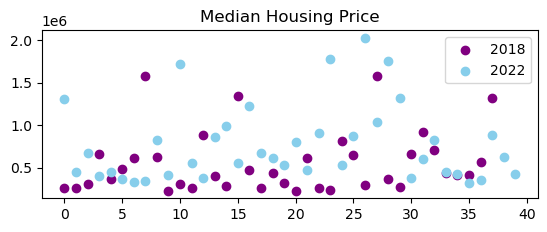

In [5]:
p1 = county_data[county_data["Year"]==2018]["Median Housing Price"]
p2 = county_data[county_data["Year"]== 2022]["Median Housing Price"]


scat(p1,p2,"2018","2022")
plt.title("Median Housing Price")
plt.savefig('../Josh/Visuals/2018_v_2022_scat')


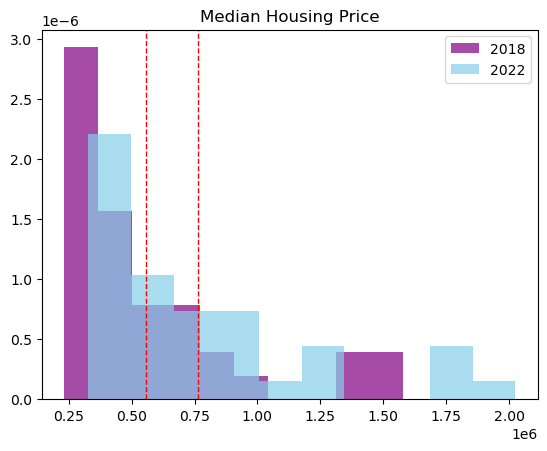

In [6]:
hist(p1,p2,"2018","2022")
plt.title("Median Housing Price")
plt.savefig('../Josh/Visuals/2018_v_2022_hist')



In [7]:
stats.ttest_ind(p1, p2, equal_var=False)

TtestResult(statistic=-2.2100841054483467, pvalue=0.030174752482520426, df=74.40056193303465)

# Pvalue of .03 shows that we can reject the null hypothesis in favor of the alternate hypothesis. This is an indicator that there is a significant statistical difference and gave backing to our analysis.

The r-value is: 0.13


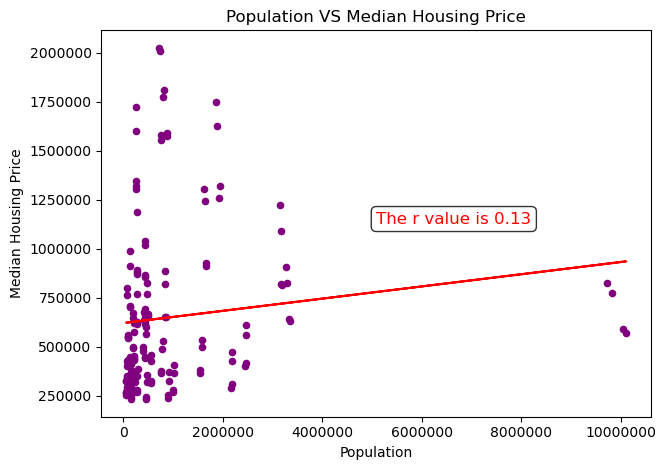

In [8]:
autoregress(county_data,'Population','Median Housing Price')


The r-value is: 0.92


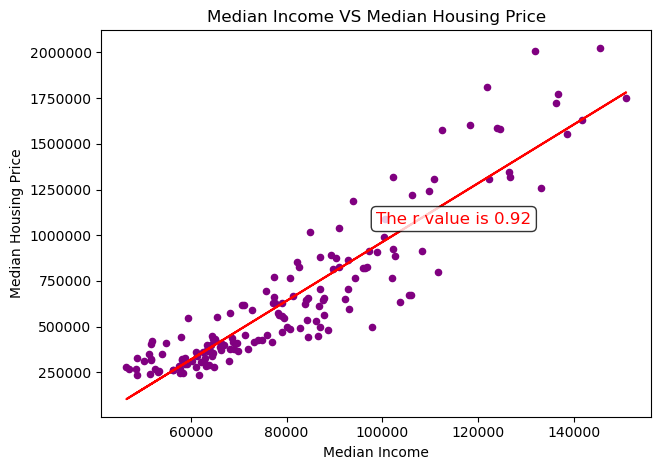

In [9]:
autoregress(county_data,'Median Income','Median Housing Price')


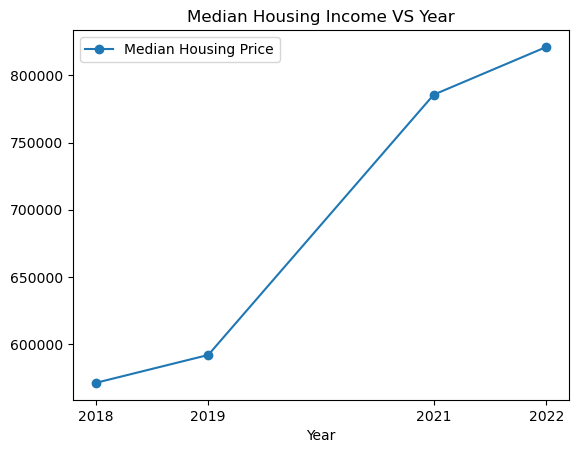

In [10]:
state_data.plot(x='Year', y='Median Housing Price', marker='o', linestyle='-')
plt.title("Median Housing Income VS Year")
plt.xticks([2018, 2019, 2021, 2022])
plt.savefig("../Josh/Visuals/income_v_housing_median_state.png")


In [11]:
heat_df_income_2018 = county_data[county_data['Year'] == 2018][['County','Median Income']]
heat_df_income_2018.set_index('County', inplace=True)

heat_df_income_2022 = county_data[county_data['Year'] == 2022][['County','Median Income']]
heat_df_income_2022.set_index('County', inplace=True)

heat_df_housing_2018 = county_data[county_data['Year'] == 2018][['County','Median Housing Price']]
heat_df_housing_2022 = county_data[county_data['Year'] == 2022][['County','Median Housing Price']]


heat_df_income_2022 = county_data[county_data['Year'] == 2022][['County','Median Income']]
heat_df_income_2022.set_index('County', inplace=True)



heat_housing_2018 = heat_df_housing_2018.rename(columns={'County': 'COUNTY_NAME'})
heat_housing_2022 = heat_df_housing_2022.rename(columns={'County': 'COUNTY_NAME'})

heat_income_2018 = heat_df_income_2018.reset_index().rename(columns={'County': 'COUNTY_NAME'})
heat_income_2022 = heat_df_income_2022.reset_index().rename(columns={'County': 'COUNTY_NAME'})

In [12]:
california_counties_geojson = "../Josh/Resources/California_County_Boundaries.geojson"  # Replace with the actual path
gdf_counties = gpd.read_file(california_counties_geojson)

gdf_counties["County"] = " County"
gdf_counties["COUNTY_NAME"] = gdf_counties["COUNTY_NAME"] + gdf_counties["County"]
gdf_counties.drop(columns="County", inplace=True)


heatmap_data = heat_housing_2022

df_heatmap = pd.DataFrame(heatmap_data)

gdf_counties_heatmap = pd.merge(gdf_counties, df_heatmap, on='COUNTY_NAME', how='left')
color_scale_range = [0,1000000]
fig = px.choropleth_mapbox(
    gdf_counties_heatmap,
    geojson=gdf_counties_heatmap.geometry,
    locations=gdf_counties_heatmap.index,
    color='Median Housing Price',
    hover_name='COUNTY_NAME',
    hover_data={'COUNTY_NAME': False, 'Median Housing Price': ':.2f'},
    color_continuous_scale="RdYlGn_r",
    range_color=color_scale_range,

    mapbox_style="carto-positron",
    center={"lat": 36.7783, "lon": -119.4179},  # Center of California
    zoom=4,
)

fig.update_layout(
    title_text="2022 Median Housing Prices",
    title_x=0.5)

fig.write_image("../Josh/Visuals/2022_heatmap_housing.png")



In [13]:


california_counties_geojson = "../Josh/Resources/California_County_Boundaries.geojson"  # Replace with the actual path
gdf_counties = gpd.read_file(california_counties_geojson)

gdf_counties["County"] = " County"
gdf_counties["COUNTY_NAME"] = gdf_counties["COUNTY_NAME"] + gdf_counties["County"]
gdf_counties.drop(columns="County", inplace=True)

heatmap_data = heat_housing_2018


df_heatmap = pd.DataFrame(heatmap_data)

gdf_counties_heatmap = pd.merge(gdf_counties, df_heatmap, on='COUNTY_NAME', how='left')
color_scale_range = [0,1000000]

fig = px.choropleth_mapbox(
    gdf_counties_heatmap,
    geojson=gdf_counties_heatmap.geometry,
    locations=gdf_counties_heatmap.index,
    color='Median Housing Price',
    hover_name='COUNTY_NAME',
    hover_data={'COUNTY_NAME': False, 'Median Housing Price': ':.2f'},
    color_continuous_scale="RdYlGn_r",
    range_color=color_scale_range,
    mapbox_style="carto-positron",
    center={"lat": 36.7783, "lon": -119.4179},  # Center of California
    zoom=4,
)
fig.update_layout(
    title_text="2018 Median Housing Prices",
    title_x=0.5)

fig.write_image("../Josh/Visuals/2018_heatmap_housing.png")




In [14]:


california_counties_geojson = "../Josh/Resources/California_County_Boundaries.geojson"  # Replace with the actual path
gdf_counties = gpd.read_file(california_counties_geojson)

gdf_counties["County"] = " County"
gdf_counties["COUNTY_NAME"] = gdf_counties["COUNTY_NAME"] + gdf_counties["County"]
gdf_counties.drop(columns="County", inplace=True)

heatmap_data = heat_income_2018


df_heatmap = pd.DataFrame(heatmap_data)

gdf_counties_heatmap = pd.merge(gdf_counties, df_heatmap, on='COUNTY_NAME', how='left')
color_scale_range = [0,100000]

fig = px.choropleth_mapbox(
    gdf_counties_heatmap,
    geojson=gdf_counties_heatmap.geometry,
    locations=gdf_counties_heatmap.index,
    color='Median Income',
    hover_name='COUNTY_NAME',
    hover_data={'COUNTY_NAME': False, 'Median Income': ':.2f'},
    color_continuous_scale="RdYlGn",
    range_color=color_scale_range,
    mapbox_style="carto-positron",
    center={"lat": 36.7783, "lon": -119.4179},  # Center of California
    zoom=4,
)
fig.update_layout(
    title_text="2018 Median Income",
    title_x=0.5)

fig.write_image("../Josh/Visuals/2018_heatmap_income.png")




In [15]:


california_counties_geojson = "../Josh/Resources/California_County_Boundaries.geojson"  # Replace with the actual path
gdf_counties = gpd.read_file(california_counties_geojson)

gdf_counties["County"] = " County"
gdf_counties["COUNTY_NAME"] = gdf_counties["COUNTY_NAME"] + gdf_counties["County"]
gdf_counties.drop(columns="County", inplace=True)

heatmap_data = heat_income_2022


df_heatmap = pd.DataFrame(heatmap_data)

gdf_counties_heatmap = pd.merge(gdf_counties, df_heatmap, on='COUNTY_NAME', how='left')
color_scale_range = [0,100000]

fig = px.choropleth_mapbox(
    gdf_counties_heatmap,
    geojson=gdf_counties_heatmap.geometry,
    locations=gdf_counties_heatmap.index,
    color='Median Income',
    hover_name='COUNTY_NAME',
    hover_data={'COUNTY_NAME': False, 'Median Income': ':.2f'},
    color_continuous_scale="RdYlGn",
    range_color=color_scale_range,
    mapbox_style="carto-positron",
    center={"lat": 36.7783, "lon": -119.4179},  # Center of California
    zoom=4,
)
fig.update_layout(
    title_text="2022 Median Income",
    title_x=0.5)

fig.write_image("../Josh/Visuals/2022_heatmap_income.png")


